# Simple Reinforcement Learning with Tensorflow Part 0: Q-Learning with Tables and Neural Networks

* Policy gradient: observation을 action으로 바로 맵핑하는 function을 학습
* Q-Learning: 특정 state에서의 value를 학습하고, 그 value를 이용해 특정 action을 취한다.



## Tabular Approaches for Tabular Environments

<p align="center">
	  <img src="https://miro.medium.com/max/700/1*MCjDzR-wfMMkS0rPqXSmKw.png"/>
</p>

* [OpenAI gym](https://gym.openai.com/)의 [FronzenLake environment](https://gym.openai.com/envs/FrozenLake-v0/)
  * 4*4 grid block
    * S: starting block / G: goal block / F: safe frozen block / H: dangerous hole
  * Objective: Agent가 hole에 빠지지 않고 start에서 goal 까지 도달할 수 있도록 학습
  * Action: up, down, left, right
  * 정기적으로 wind가 불어 선택하지않은 block으로 agent를 움직인다.
  * 모든 step에서 reward는 0이지만, goal에 도달하면 reward는 1이다.
    * 따라서 알고리즘이 long-term expected reward를 학습하도록 만들어야 한다.
      * Q-Learning이 제공하는 것이 바로 이런 점이다!
* Q-Learning => environment 내에서 가능한 모든 state(row)와 action(column) value에 대한 table이다.
  * table의 각 cell에 대해 해당 state에서 어떤 action을 취했을 때의 value를 학습하게 된다.
  * FrozenLake의 경우 16개의 가능한 state와 4개의 가능한 action
    * 따라서 Q-value table은 16*4가 된다.
  * 1) table을 uniform하게 초기화 한 다음 2) 각 action을 취했을때의 reward를 관측하고 table을 업데이트 한다.
  * Q-table 업데이트는 **Bellman Equation** 을 이용해 진행한다.
    * 해당 action을 취했을 때 얻을 수 있는 expected long-term reward가 현재 state에서 취할 수 있는 가장 좋은 future action에 대한 expected reward와 현재 action을 결합한 것이 immediate reward와 동일하다는 관점에서 계산을 진행한다.
      * future action에 대한 table을 업데이트 하기 위해 추정하는 과정에서 Q-table을 재사용할 수 있다.
    * **Eq 1:** Q(s,a) = r + γ(max(Q(s’,a’))
      * given state s와 action a에 대한 Q값은 current reward r과 next state s'에대한 maximum discounted(γ) future reward의 기댓값의 합으로 계산할 수 있다.
        * discount variable: 현재 reward와 비교했을 때 미래에 가능한 reward가 얼마나 중요하게 표현될지를 결정하는 역할을 한다.
          * 주어진 state에 대해 어떤 action을 취했을 때의 future reward 기댓값에 대한 정확한 측정을 얻을 수 있다. 

In [1]:
"""
Q-Table Learning
"""
import gym
import numpy as np

In [2]:
"""
Load the environment
"""
env = gym.make('FrozenLake-v0')

In [3]:
"""
Implement Q-Table learning algorithm
"""
# 테이블을 0으로 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])

# 학습 파라미터 설정
lr = .8
y = .95
num_episodes = 2000

# 각 에피소드 별 reward와 step을 합칠 리스트 만들기
rList = list()
for i in range(num_episodes):
    # environment 초기화하고 새로운 observation 얻기
    s = env.reset()
    rAll = 0 # reward 합
    d = False
    j = 0
    
    # Q-Table learning algorithm
    while j < 99:
        j += 1
        #  Q table에서 greedy하게 action을 선택한다.
        a = np.argmax(Q[s, :] + np.random.randn(1, env.action_space.n) * (1. / (i+1))) # 랜덤하게 state 선택
        # new state와 reward
        sl, r, d, _ = env.step(a)
        # 새로운 knowledge로 Q-Table 업데이트
        Q[s, a] = Q[s,a] + lr*(r + y*np.max(Q[sl,:]) - Q[s,a])
        rAll += r
        s = sl # 현재 state 바꿔줌
        if d == True: 
            break
    rList.append(rAll)

In [4]:
print("Score over Time: ", str(sum(rList)/num_episodes))

Score over Time:  0.658


In [5]:
Q

array([[2.33299098e-01, 3.45934190e-03, 9.45471302e-03, 1.34568714e-02],
       [2.56129582e-03, 1.05623342e-03, 1.43030014e-04, 3.03210254e-01],
       [4.70982650e-03, 4.43112936e-03, 7.53417979e-03, 1.94669802e-01],
       [2.15678684e-04, 2.44042207e-03, 2.52977598e-04, 9.44679989e-02],
       [4.48391518e-01, 0.00000000e+00, 3.06343837e-03, 3.53365820e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70159550e-02, 2.78132026e-06, 1.91170712e-04, 2.25263195e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04557292e-03, 7.91035697e-03, 0.00000000e+00, 6.50437433e-01],
       [9.56913185e-04, 2.63550020e-01, 1.51559868e-03, 5.29683128e-03],
       [1.31478448e-01, 1.41959505e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.96266308e-03, 0.00000000e+00, 7.62550744e

## Q-Learning with Neural Networks
* 실제 세계에서는 가능한 state의 수가 너무 많기 때문에 table을 이용해서 모든 state를 표현하는 것은 불가능하다.
    * table을 사용하지 않고 action에 대한 Q-value를 만들어내는 것이 필요하다.
        * neural network를 이용하자.
    * neural network를 function approximator로 이용하면, 어떤 경우던 가능한 state를 모두 벡터로 표현할 수 있으며, 그 벡터들을 Q-value로 맵핑하는 것을 학습할 수 있다.
* FrozenLake example:
    * one-layer network를 이용
        * state들은 1\*16 형태의 one-hot vector로 만들기
        * 4개의 Q-value를 위한 벡터 만들기
            * 하나의 Q-value는 하나의 action을 뜻한다.
    * 이렇게 approximation function을 이용하게 되면 레이어를 추가한다던가, activation function이나 input type을 바꿀 때 손쉽게 네트워크를 수정할 수 있다.
* 업데이트 하는 방법 또한 달라진다.
    * 테이블을 직접 업데이트 하는 방식 대신 역전파와 loss function을 이용한다.
        * loss function: sume-of-squares loss
            * current predicted Q-Value와 target value 간 차이를 구하고, 이를 통해 계산된 gradient가 네트워크로 전파된다.
            * 현재 예시에서 target value는 equation 1에서 계산한 값들이 된다!
            * Loss = ∑(Q-target - Q)² 

In [13]:
"""
Q-Network Learning
"""
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
env = gym.make("FrozenLake-v0")

In [15]:
"""
Implementing the network itself
"""
tf.reset_default_graph()

In [16]:
# action을 선택하기 위한 feed-forward network 생성
inputs1 = tf.placeholder(shape=[1, 16], dtype = tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

In [17]:
# target과 predicted Q-value 간 loss function 선언
nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [34]:
"""
Train the network
"""
init = tf.initialize_all_variables()

# learning parameter 설정
y = .99
e = 0.1
num_episodes = 2000

# 에피소드 별 total reward와 step 기록하는 리스트 생성
jList = list()
rList = list()

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # environment reset & 첫 observation 얻기
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        # Q-network
        while j < 99:
            j += 1
            # \epsilon-gredy하게 Q-network에서 action 선택
            a, allQ = sess.run([predict, Qout], feed_dict = {inputs1: np.identity(16)[s:s+1]})
            
            # \epsilon 확률 만큼 랜덤하게 action 선택
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # 새로운 state와 reward 얻기
            sl, r, d, _ = env.step(a[0])
            # network에 새로운 state를 feed해 Q-value를 얻는다
            Q1 = sess.run(Qout, feed_dict = {inputs1: np.identity(16)[sl:sl+1]})
            # maxQ를 얻고 선택한 action에 대한 target value를 설정한다.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            # target과 predicted Q_value 이용해 네트워크를 학습시킨다.
            _, W1 = sess.run([updateModel, W], feed_dict = {inputs1: np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = sl
            if d == True:
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("percent of succesful episodes: ", str(sum(rList) / num_episodes), "%")

percent of succesful episodes:  0.426 %


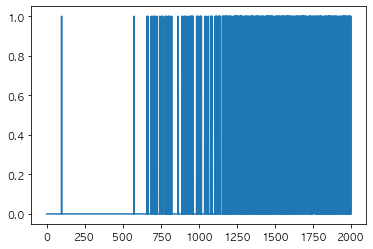

In [32]:
plt.plot(rList)

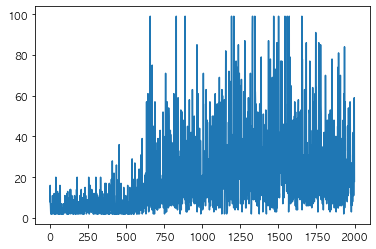

In [33]:
plt.plot(jList)

* 하지만 Q-table에 비해 효과적이지 않은 결과를 보여줌
    * NN이 환경에 좀 더 유연하게 작동할 수 있도록 만들어주지만, 안정성 부분에서는 높은 비용 문제를 보인다.
    * 좀 더 robust하게 학습할 수 있도록 다음과 같은 기법들을 추가해 사용한다.
        * Experience Replay
        * Freezing Target Networks